### Exploration/Analysis of Minneapolis Winter Weather 1880-2020
data sourced from Minnesota DNR

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns


Start with some data cleaning to prepare for analysis.

In [3]:
# Load file
df = pd.read_csv('msp_historical_weather.csv')
# Remove first column
df = df.drop(columns=['Unnamed: 0'])
# Show sample
df.sample()
#Check datatypes
df.dtypes
# check for na's
df.isnull().sum()
# drop where tempature is missing
df = df.loc[150:]
df.sample()
#find and replace T with .01
df = df.replace('T',.01)
# replace missing values with Nan
df = df.replace('M','NaN')
# show sample
df.sample()

,Date,MaxTemp,MinTemp,Precip,Snow,SnowDepth,datetime,day,month,year,season
20031,4/24/1941,59,31,0,0,0,1941-04-24,24,4,1941,Spring


Tempature Trends in Winter

In [4]:
# Make DF just for tempatures
temps = df[['MaxTemp','MinTemp','Date','day','month','year','season','datetime']]
# Convert temps from Objects to Numbers
# Get rid of NaN values
temps=temps[(temps['MaxTemp']!= 'NaN') & (temps['MinTemp'] != 'NaN')]
# Conver MaxTemp and MinTemp to numerical values
temps.MaxTemp=pd.to_numeric(temps.MaxTemp)
temps.MinTemp=pd.to_numeric(temps.MinTemp)
#Apply to numeric ignoring uneeded columns
temps = temps.apply(pd.to_numeric, errors='ignore')
# Check dateatypes to confirm that Temps are Integers
temps.dtypes

MaxTemp      int64
MinTemp      int64
Date        object
day          int64
month        int64
year         int64
season      object
datetime    object
dtype: object

Now add some information to better inform analysis. Found the average Tempature and high and Low Tempatures.

In [5]:
# add column with average tempature
temps['AveTemp'] = (temps['MaxTemp'] + temps['MinTemp']) / 2
# add column with differance between High and Low Temp
temps['HighLowDiff'] = (temps['MaxTemp'] - temps['MinTemp'])
# Show sample 
temps.sample(5)
# subset just winter
winter = temps[temps['season']=='Winter']
winter.sample(5)
# Now just segment out January
jan = winter[winter['month']==1]
# Show sample
jan.sample(5)

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
562,24,0,1877-01-21,21,1,1877,Winter,1877-01-21,12.0,24
8148,13,-14,1/27/1961,27,1,1961,Winter,1961-01-27,-0.5,27
1375,7,-28,1886-01-22,22,1,1886,Winter,1886-01-22,-10.5,35
7581,27,9,1/2/1955,2,1,1955,Winter,1955-01-02,18.0,18
11743,33,27,1/12/2001,12,1,2001,Winter,2001-01-12,30.0,6


Show sum stats for January

In [6]:
jan.describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,4588.000000,4588.000000,4588.000000,4588.0,4588.000000,4588.000000,4588.000000
mean,21.820837,4.776373,16.000000,1.0,1946.500000,13.298605,17.044464
std,13.446458,14.620544,8.945247,0.0,42.727601,13.521527,7.603181
min,-20.000000,-41.000000,1.000000,1.0,1873.000000,-29.000000,1.000000
25%,12.000000,-6.000000,8.000000,1.0,1909.750000,3.500000,12.000000
50%,23.000000,5.000000,16.000000,1.0,1946.500000,14.500000,16.000000
75%,32.000000,16.000000,24.000000,1.0,1983.250000,24.000000,21.000000
max,58.000000,42.000000,31.000000,1.0,2020.000000,50.000000,49.000000


# Global Tempature Changes
Has global warming changed the average tempatures in Minneapolis over the last 100 years?


In [7]:
jan.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
4896,34,18,1/24/1925,24,1,1925,Winter,1925-01-24,26.0,16


In [8]:
# make df based on dates
#old_times = 
# Old times for years 1890-1920
old_times = jan.query("(year > 1889) and (year < 1921)")
old_times['time'] = '1890-1920'
old_times['split'] = 'old'
# Present for years 1990-1920
present = jan.query("(year > 1989) and (year < 2021)")
present['time']='1990-2020'
present['split']='present'

# concat back into one df
old_and_present = pd.concat([old_times,present])
old_and_present.head()

<ipython-input-8-96ebb24c774d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_times['time'] = '1890-1920'
<ipython-input-8-96ebb24c774d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_times['split'] = 'old'
<ipython-input-8-96ebb24c774d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,time,split
1715,31,10,1890-01-01,1,1,1890,Winter,1890-01-01,20.5,21,1890-1920,old
1716,10,-8,1890-01-02,2,1,1890,Winter,1890-01-02,1.0,18,1890-1920,old
1717,10,-12,1890-01-03,3,1,1890,Winter,1890-01-03,-1.0,22,1890-1920,old
1718,21,10,1890-01-04,4,1,1890,Winter,1890-01-04,15.5,11,1890-1920,old
1719,13,4,1890-01-05,5,1,1890,Winter,1890-01-05,8.5,9,1890-1920,old


Violin Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

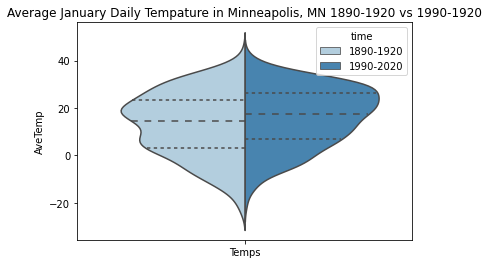

In [9]:
import matplotlib.pyplot as plt
#violin plot
ax = sns.violinplot(x=['Temps']*len(old_and_present),
                    y="AveTemp",hue='time',data=old_and_present,
                    split=True,palette='Blues',inner="quart",)
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')
                    
                   


    # Draw a nested violinplot and split the violins for easier comparison
#sns.violinplot(x=['Data']*len(tips),y="total_bill", hue="smoker",
               #split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               #data=tips)
#sns.despine(left=True)

Box Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

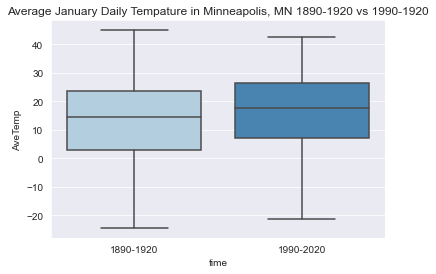

In [10]:
# boxplot
sns.color_palette('deep')
sns.set_style('darkgrid')

ax = sns.boxplot(x="time",y="AveTemp",data=old_and_present,palette='Blues')
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

Find rempature trend in summer

In [11]:
# query to segment out summer
temps.loc[100:].query("season =='Fall'").groupby('year')['AveTemp'].max()

year
1872    60.0
1873    72.5
1874    79.0
1875    79.0
1876    66.5
        ... 
2016    76.0
2017    83.5
2018    81.0
2019    79.0
2020    73.0
Name: AveTemp, Length: 149, dtype: float64

In [12]:
temps.dtypes

MaxTemp          int64
MinTemp          int64
Date            object
day              int64
month            int64
year             int64
season          object
datetime        object
AveTemp        float64
HighLowDiff      int64
dtype: object

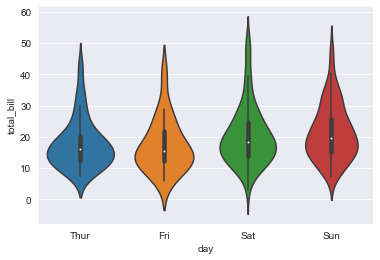

In [13]:
tips = sns.load_dataset("tips")

ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [14]:
# convert string to catogory
temps['cat'] = temps['season'].astype("category")
temps.dtypes

MaxTemp           int64
MinTemp           int64
Date             object
day               int64
month             int64
year              int64
season           object
datetime         object
AveTemp         float64
HighLowDiff       int64
cat            category
dtype: object

In [15]:
temps.groupby('season').count()

,MaxTemp,MinTemp,Date,day,month,year,datetime,AveTemp,HighLowDiff,cat
season,,,,,,,,,,
Fall,13529,13529,13529,13529,13529,13529,13529,13529,13529,13529
Spring,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615
Summer,13616,13616,13616,13616,13616,13616,13616,13616,13616,13616
Winter,13387,13387,13387,13387,13387,13387,13387,13387,13387,13387


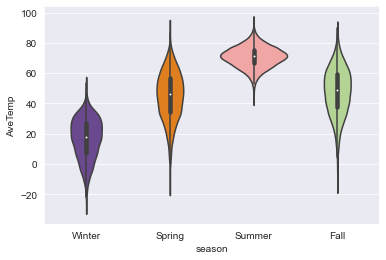

In [16]:
ax=sns.violinplot(x=temps['season'],y=temps['AveTemp'],palette='Paired_r')

tempature patterns in diff seasons

historically what has the tempature been on January 18th?

In [17]:
jan.query("(day == '19') and (month=='1')").mean()

MaxTemp          21.945946
MinTemp           3.966216
day              19.000000
month             1.000000
year           1946.500000
AveTemp          12.956081
HighLowDiff      17.979730
dtype: float64

In [18]:
jan.query("(day == '20') and (month=='1')").mean()

MaxTemp          22.033784
MinTemp           5.479730
day              20.000000
month             1.000000
year           1946.500000
AveTemp          13.756757
HighLowDiff      16.554054
dtype: float64

In [19]:
# query for january from 1970 to present
jan.query("(year > 1969)").describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,1581.000000,1581.000000,1581.000000,1581.0,1581.000000,1581.000000,1581.000000
mean,22.545857,6.213789,16.000000,1.0,1995.000000,14.379823,16.332068
std,12.917360,14.413947,8.947102,0.0,14.724259,13.164290,7.486387
min,-16.000000,-34.000000,1.000000,1.0,1970.000000,-22.000000,1.000000
25%,13.000000,-5.000000,8.000000,1.0,1982.000000,4.500000,11.000000
50%,24.000000,7.000000,16.000000,1.0,1995.000000,15.500000,15.000000
75%,33.000000,18.000000,24.000000,1.0,2008.000000,25.000000,21.000000
max,57.000000,37.000000,31.000000,1.0,2020.000000,42.500000,49.000000


Yearly Tempature

In [20]:
# query years 1970-2020
df_1970_2020 = temps.query("(year < 2021) and (year > 1969)")
# query years 1920-1970
df_1920_1970 = temps.query("(year < 1970) and (year > 1919)")
# query years 1880 - 2020
df_1880_1920 = temps.query("(year < 1920) and (year > 1970)")


In [22]:
# CHECK NEW DF'S
df_1970_2020.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
10975,45,19,2/26/1992,26,2,1992,Winter,1992-02-26,32.0,26,Winter


### SUPER COLD!!!
Analysis to compare Polar Vortex of 2018 to Upcoming Artic Air Blast.